# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Healthcare Project: Identifying Risk Factors Across Chronic Diseases

**Who**: Healthcare administrators who design and oversee chronic illness screening programs.

**What**: Behavioral and psychological factors—like stress, sleep, and physical inactivity—strongly predict risk for diabetes, hypertension, and CKD; implement behavioral screening in prevention efforts.

**How**: Use analysis of three real-world datasets to show overlapping behavioral risk factors and support early identification strategies.




# 3. Homework - work with your own data

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
%pip install seaborn
import seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

**Hypertension Dataset**



In [37]:
# Read the hypertension dataset using the full file path
df = pd.read_csv(r"C:\Users\annma\OneDrive\Desktop\CAPSTONE STUFF\hypertension_dataset.csv")

# Basic structure
print("=== Dataset Info ===")
df.info()

# Summary statistics
print("\n=== Summary Statistics (describe) ===")
display(df.describe(include='all'))

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-nu

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
count,174982,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982,174982.000000,174982,174982,...,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982,174982,174982,174982
unique,20,NaN,NaN,NaN,NaN,NaN,3,NaN,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,3,3,2
top,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,Current,NaN,High,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,Female,Secondary,Retired,High
freq,8931,NaN,NaN,NaN,NaN,NaN,58574,NaN,58462,87491,...,NaN,NaN,NaN,NaN,NaN,NaN,87675,58633,58559,125781
mean,NaN,53.493319,27.494672,224.539335,134.505229,89.450315,NaN,14.991069,NaN,NaN,...,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187,NaN,NaN,NaN,NaN
std,NaN,20.786353,7.213866,43.361589,26.019268,17.310789,NaN,8.652624,NaN,NaN,...,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882,NaN,NaN,NaN,NaN
min,NaN,18.000000,15.000000,150.000000,90.000000,60.000000,NaN,0.000000,NaN,NaN,...,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000,NaN,NaN,NaN,NaN
25%,NaN,36.000000,21.200000,187.000000,112.000000,74.000000,NaN,7.500000,NaN,NaN,...,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000,NaN,NaN,NaN,NaN
50%,NaN,54.000000,27.500000,225.000000,135.000000,89.000000,NaN,15.000000,NaN,NaN,...,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000,NaN,NaN,NaN,NaN
75%,NaN,71.000000,33.700000,262.000000,157.000000,104.000000,NaN,22.500000,NaN,NaN,...,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000,NaN,NaN,NaN,NaN


### First look at the data

We’ve got 174,982 rows and 23 columns, so it's a decent-sized dataset.  

A few things stand out:
- The average age is around 53, and BMI is about 27.5 — slightly on the higher side.
- Blood pressure numbers also seem a bit elevated, with systolic averaging 134 and diastolic around 89 (duh they have hypertension)
- It looks like our target column, **Hypertension**, is heavily skewed toward "High" — something to keep in mind for class balance later on.

Next up: I’ll check for duplicate rows, outliers, and anything that looks off before I start prepping this for analysis.


In [38]:
# Duplicate rows
print("\n=== Duplicate Rows ===")
print("Number of duplicate rows:", df.duplicated().sum())

# Duplicate values in each column
print("\n=== Duplicate Values in Columns ===")
for col in df.columns:
    total = len(df[col])
    unique = df[col].nunique()
    if unique < total:
        print(f"{col}: {total - unique} repeated values")

# Mean, median, mode
print("\n=== Central Tendency ===")
for col in df.select_dtypes(include=['float64', 'int64']):
    print(f"{col} → Mean: {df[col].mean():.2f}, Median: {df[col].median()}, Mode: {df[col].mode()[0]}")



=== Duplicate Rows ===
Number of duplicate rows: 0

=== Duplicate Values in Columns ===
Country: 174962 repeated values
Age: 174910 repeated values
BMI: 174731 repeated values
Cholesterol: 174832 repeated values
Systolic_BP: 174892 repeated values
Diastolic_BP: 174922 repeated values
Smoking_Status: 174979 repeated values
Alcohol_Intake: 174681 repeated values
Physical_Activity_Level: 174979 repeated values
Family_History: 174980 repeated values
Diabetes: 174980 repeated values
Stress_Level: 174973 repeated values
Salt_Intake: 174851 repeated values
Sleep_Duration: 174921 repeated values
Heart_Rate: 174932 repeated values
LDL: 174862 repeated values
HDL: 174912 repeated values
Triglycerides: 174782 repeated values
Glucose: 174852 repeated values
Gender: 174980 repeated values
Education_Level: 174979 repeated values
Employment_Status: 174979 repeated values
Hypertension: 174980 repeated values

=== Central Tendency ===
Age → Mean: 53.49, Median: 54.0, Mode: 73
BMI → Mean: 27.49, Median

### Duplicate checks and central tendency

There are no duplicate rows in the dataset, so every entry is unique.

Most columns have repeated values, which makes sense — things like BMI, cholesterol, or smoking status aren’t expected to be unique. Nothing stands out as inappropriately duplicated.

Looking at the central tendency:
- For most numeric columns, the **mean and median are pretty close**, suggesting the data is relatively symmetric.
- One exception is the **Age** column the mode is 73, which stands out compared to the average (mean) of 53. That might seem off at first, but it lines up with earlier info showing that a large portion of this population is retired.
- Some other variables, like **Triglycerides, LDL, and Cholesterol**, have modes that differ noticeably from the mean. This might point to skewed or even bimodal distributions that I’ll want to visualize next.

Next up: I’ll check for missing values and make sure there’s nothing inconsistent in the data.


In [39]:
# Missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# === Inconsistent Data ===
print("\n=== Inconsistencies ===")

# Age: check for values less than or equal to 0
if 'Age' in df.columns:
    invalid_age = df[df['Age'] <= 0]
    print(f"Invalid ages (<= 0): {len(invalid_age)} rows")

# BMI: check for extreme values <10 or >60
if 'BMI' in df.columns:
    extreme_bmi = df[(df['BMI'] < 10) | (df['BMI'] > 60)]
    print(f"Extreme BMI values (<10 or >60): {len(extreme_bmi)} rows")

# Heart Rate: check for values <40 or >180
if 'Heart_Rate' in df.columns:
    abnormal_hr = df[(df['Heart_Rate'] < 40) | (df['Heart_Rate'] > 180)]
    print(f"Abnormal Heart Rates (<40 or >180): {len(abnormal_hr)} rows")

# Stress Level: assume valid range is 0 to 10
if 'Stress_Level' in df.columns:
    invalid_stress = df[(df['Stress_Level'] < 0) | (df['Stress_Level'] > 10)]
    print(f"Invalid Stress Level values (outside 0–10): {len(invalid_stress)} rows")
# Check for missing values in each column
missing_counts = htn.isna().sum()
missing_percent = (missing_counts / len(htn)) * 100

# Combine into a summary table
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
})

# Display only columns with at least one missing value
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Show the result



=== Missing Values ===
Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

=== Inconsistencies ===
Invalid ages (<= 0): 0 rows
Extreme BMI values (<10 or >60): 0 rows
Abnormal Heart Rates (<40 or >180): 0 rows
Invalid Stress Level values (outside 0–10): 0 rows


### Missing and inconsistent values

Again, things are pretty boring here : no missing values at all.

I checked for odd or unrealistic values in columns like age, BMI, heart rate, and stress level. Nothing major popped up:
- No invalid ages (like values less than or equal to zero)
- No extreme BMIs outside the 10–60 range
- No heart rates that look dangerously low or high
- Stress levels all fall within the expected 0–10 scale

Nothing looks off or messy, so I can move on without doing any cleanup here. I’ll still keep an eye out for other potential outliers in later steps.

In [40]:
# One-hot encode categoricals
print("\n=== One-Hot Encoded Columns ===")
df_encoded = pd.get_dummies(df, drop_first=True)
display(df_encoded.head(2))

# Class imbalance check
print("\n=== Class Imbalance (Hypertension) ===")
if 'Hypertension' in df.columns:
    print(df['Hypertension'].value_counts())



=== One-Hot Encoded Columns ===


,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,...,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Family_History_Yes,Diabetes_Yes,Gender_Male,Education_Level_Secondary,Education_Level_Tertiary,Employment_Status_Retired,Employment_Status_Unemployed,Hypertension_Low
0,58,29.5,230,160,79,27.9,9,14.7,6.1,80,...,True,False,True,True,False,False,False,False,True,False
1,34,36.2,201,120,84,27.5,6,10.8,9.8,56,...,False,False,True,True,True,True,False,False,True,False



=== Class Imbalance (Hypertension) ===
Hypertension
High    125781
Low      49201
Name: count, dtype: int64


### One-hot encoding and class balance

Categorical variables are now one-hot encoded, bringing us to 45 total columns. The new binary columns look good values like `Diabetes_Yes` and `Physical_Activity_Level_Low` show up as expected.

Our target, **Hypertension**, is imbalanced: most entries are labeled “High.” I’ll need to keep that in mind when building models to avoid biased predictions.


**Hypertension Dataset Summary**

**Dataset Overview**
The hypertension dataset contains 174,982 records and 23 columns. There are no missing or null values in the dataset. The features include a combination of numeric and categorical variables, such as age, BMI, cholesterol levels, and lifestyle factors.

**Duplicate and Inconsistent Data**
- Duplicate rows: 0 found
- Duplicate values in individual columns: Repeated values are expected in categorical variables (e.g., "Smoking_Status") and numerical measures with limited precision. No inappropriate repetitions were identified.
- Inconsistencies:
  - No invalid ages (e.g., less than or equal to zero).
  - No extreme or implausible BMI values (e.g., below 10 or above 60).
  - No obviously inconsistent entries in terms of data logic.

**Central Tendencies**
For all numeric columns, the mean, median, and mode were calculated. These values are within plausible clinical ranges and suggest the data is well-distributed and not strongly skewed.

**Data Quality and Usability**
The dataset is clean and well-formatted for analysis. Categorical variables were successfully one-hot encoded.

**Class Balance**
Hypertension variable counts:
- High: 125,781
- Low: 49,201

There is a moderate class imbalance, with "High" being significantly more prevalent than "Low." This should be taken into account in model development and evaluation (e.g., using stratified sampling or resampling techniques).

**Conclusion**
This dataset is complete, clean, and appropriate for further statistical or machine learning analysis. Minor attention should be paid to class imbalance, but otherwise no data corrections are necessary.




**Diabetes Dataset**

In [41]:
df_multi = pd.read_csv(r"C:\Users\annma\OneDrive\Desktop\CAPSTONE STUFF\diabetes_012_health_indicators_BRFSS2015.csv")
df_binary = pd.read_csv(r"C:\Users\annma\OneDrive\Desktop\CAPSTONE STUFF\diabetes_binary_health_indicators_BRFSS2015.csv")
df_balanced = pd.read_csv(r"C:\Users\annma\OneDrive\Desktop\CAPSTONE STUFF\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

datasets = {
    "Multiclass (012)": df_multi,
    "Binary": df_binary,
    "Balanced Binary (50/50)": df_balanced
}

for name, df in datasets.items():
    print(f"\n=== {name.upper()} ===")
    print("\n=== Dataset Info ===")
    df.info()
    
    print("\n=== Summary Statistics (describe) ===")
    display(df.describe(include='all'))




=== MULTICLASS (012) ===

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenH

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000



=== BINARY ===

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth       

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000



=== BALANCED BINARY (50/50) ===

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth        

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### First look at the data

We’ve got three versions of the diabetes dataset, all based on the CDC’s 2015 BRFSS survey.  
Each version contains 21 features and no missing values.

A few things stand out:
- The multiclass and binary datasets each have over 250,000 rows. The balanced binary version has about 70,000, with a 50/50 split between diabetic and non-diabetic cases.
- BMI averages around 28 but goes as high as 98 (I had to check if that was even possible) It's probably an outlier worth flagging.
- The difference between the datasets isn’t the features, but how the diabetes outcome is defined and whether the class distribution is balanced.

Next up: I’ll check duplicates.

In [42]:
for name, df in datasets.items():
    print(f"\n=== {name.upper()} ===")

    # Duplicate rows
    print("\n=== Duplicate Rows ===")
    print("Number of duplicate rows:", df.duplicated().sum())

    # Duplicate values in columns
    print("\n=== Duplicate Values in Columns ===")
    for col in df.columns:
        total = len(df[col])
        unique = df[col].nunique()
        if unique < total:
            print(f"{col}: {total - unique} repeated values")

    # Mean, median, mode
    print("\n=== Central Tendency ===")
    for col in df.select_dtypes(include=['float64', 'int64']):
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()
        if not mode.empty:
            mode_val = mode[0]
            print(f"{col} → Mean: {mean:.2f}, Median: {median}, Mode: {mode_val}")


    



=== MULTICLASS (012) ===

=== Duplicate Rows ===
Number of duplicate rows: 23899

=== Duplicate Values in Columns ===
Diabetes_012: 253677 repeated values
HighBP: 253678 repeated values
HighChol: 253678 repeated values
CholCheck: 253678 repeated values
BMI: 253596 repeated values
Smoker: 253678 repeated values
Stroke: 253678 repeated values
HeartDiseaseorAttack: 253678 repeated values
PhysActivity: 253678 repeated values
Fruits: 253678 repeated values
Veggies: 253678 repeated values
HvyAlcoholConsump: 253678 repeated values
AnyHealthcare: 253678 repeated values
NoDocbcCost: 253678 repeated values
GenHlth: 253675 repeated values
MentHlth: 253649 repeated values
PhysHlth: 253649 repeated values
DiffWalk: 253678 repeated values
Sex: 253678 repeated values
Age: 253667 repeated values
Education: 253674 repeated values
Income: 253672 repeated values

=== Central Tendency ===
Diabetes_012 → Mean: 0.30, Median: 0.0, Mode: 0.0
HighBP → Mean: 0.43, Median: 0.0, Mode: 0.0
HighChol → Mean: 0.42, 

### Checking for duplicates and repeated values

All three datasets contain duplicate rows, especially the full multiclass and binary versions, which each have over 23,000 duplicates. The balanced version has far fewer (about 1,600), which is expected given its smaller size.

Many columns are dominated by repeated values which is not surprising since some features will naturally have the same number. In the full versions, nearly all entries are duplicates for every column. BMI stands out slightly with more variation, but still has over 250,000 repeated values.

### Central tendencies across datasets

There’s not much variation in mean or median across the three versions. A few observations:
- **BMI** averages around 28–30, which leans overweight. The mode is 27 across all sets.
- Most health-related behaviors (like smoking or physical activity) show expected trends, with physically active and non-smoking responses being more common.
- Variables like **Age**, **Income**, and **Education** are stored as category codes, with age clustered around 8 (representing mid-to-late adulthood).

The balanced binary version differs slightly, especially with higher rates of high blood pressure and cholesterol, which makes sense given it’s intentionally balanced for diabetes outcome.

Next: I'll move on to checking for missing values and inconsistencies 


In [43]:
# Loop through all datasets and check for missing values and inconsistent entries
for name, df in datasets.items():
    print(f"\n\n=== Missing & Inconsistency Check: {name} ===")

    # === Missing values
    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    # === Inconsistent Data ===
    print("\n--- Inconsistencies ---")

    # Age should be between 1 and 13 (age categories)
    if 'Age' in df.columns:
        invalid_age = df[(df['Age'] < 1) | (df['Age'] > 13)]
        print(f"Invalid Age values (outside 1–13): {len(invalid_age)} rows")

    # BMI: Check for extreme values <10 or >60
    if 'BMI' in df.columns:
        extreme_bmi = df[(df['BMI'] < 10) | (df['BMI'] > 60)]
        print(f"Extreme BMI values (<10 or >60): {len(extreme_bmi)} rows")

    # GenHlth: valid values 1–5
    if 'GenHlth' in df.columns:
        bad_genhlth = df[(df['GenHlth'] < 1) | (df['GenHlth'] > 5)]
        print(f"Invalid GenHlth values (outside 1–5): {len(bad_genhlth)} rows")

    # Education: valid values 1–6
    if 'Education' in df.columns:
        bad_edu = df[(df['Education'] < 1) | (df['Education'] > 6)]
        print(f"Invalid Education values (outside 1–6): {len(bad_edu)} rows")

    # Income: valid values 1–8
    if 'Income' in df.columns:
        bad_income = df[(df['Income'] < 1) | (df['Income'] > 8)]
        print(f"Invalid Income values (outside 1–8): {len(bad_income)} rows")

    # MentHlth & PhysHlth: valid range 0–30
    for col in ['MentHlth', 'PhysHlth']:
        if col in df.columns:
            invalid = df[(df[col] < 0) | (df[col] > 30)]
            print(f"Invalid {col} values (outside 0–30): {len(invalid)} rows")

    # Binary variables: Should only be 0 or 1
    binary_cols = [
        'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
        'DiffWalk', 'Sex'
    ]
    for col in binary_cols:
        if col in df.columns:
            bad_vals = df[~df[col].isin([0, 1])]
            if not bad_vals.empty:
                print(f"{col} contains values other than 0 or 1: {len(bad_vals)} rows")







=== Missing & Inconsistency Check: Multiclass (012) ===

--- Missing Values ---
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

--- Inconsistencies ---
Invalid Age values (outside 1–13): 0 rows
Extreme BMI values (<10 or >60): 805 rows
Invalid GenHlth values (outside 1–5): 0 rows
Invalid Education values (outside 1–6): 0 rows
Invalid Income values (outside 1–8): 0 rows
Invalid MentHlth values (outside 0–30): 0 rows
Invalid PhysHlth values (outside 0–30): 0

### Missing Values and Inconsistency Check Summary

I reviewed all three diabetes datasets for missing values and inconsistent entries. Here's what stood out:

- **No missing values** were found in any of the datasets. That’s a strong starting point for analysis.
- **BMI values go up to 98**, which is unusually high, 98 is rare but not impossible. Still, it may be worth flagging during modeling.
- **Age**, **GenHlth**, **Education**, **Income**, **MentHlth**, and **PhysHlth** values all fell within their expected valid ranges.
- All **binary columns** (like `Smoker`, `HighBP`, `PhysActivity`, etc.) only contained 0s and 1s, with no anomalies.

Overall, the data is impressively clean. The only potential concern is the presence of a few extreme BMI values, which might impact model performance if not handled carefully.

Next lets check for mean, median, mode


In [44]:
print("\n=== CENTRAL TENDENCY ===\n")
for name, df in datasets.items():
    print(f"\n{name.upper()}\n")
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        mean = df[col].mean()
        median = df[col].median()
        try:
            mode = df[col].mode()[0]
        except IndexError:
            mode = "N/A"
        print(f"{col:<25} → Mean: {mean:>6.2f}, Median: {median:>5}, Mode: {mode}")



=== CENTRAL TENDENCY ===


MULTICLASS (012)

Diabetes_012              → Mean:   0.30, Median:   0.0, Mode: 0.0
HighBP                    → Mean:   0.43, Median:   0.0, Mode: 0.0
HighChol                  → Mean:   0.42, Median:   0.0, Mode: 0.0
CholCheck                 → Mean:   0.96, Median:   1.0, Mode: 1.0
BMI                       → Mean:  28.38, Median:  27.0, Mode: 27.0
Smoker                    → Mean:   0.44, Median:   0.0, Mode: 0.0
Stroke                    → Mean:   0.04, Median:   0.0, Mode: 0.0
HeartDiseaseorAttack      → Mean:   0.09, Median:   0.0, Mode: 0.0
PhysActivity              → Mean:   0.76, Median:   1.0, Mode: 1.0
Fruits                    → Mean:   0.63, Median:   1.0, Mode: 1.0
Veggies                   → Mean:   0.81, Median:   1.0, Mode: 1.0
HvyAlcoholConsump         → Mean:   0.06, Median:   0.0, Mode: 0.0
AnyHealthcare             → Mean:   0.95, Median:   1.0, Mode: 1.0
NoDocbcCost               → Mean:   0.08, Median:   0.0, Mode: 0.0
GenHlth        

### Central Tendency Summary

I analyzed the **mean, median, and mode** for all three datasets: **Multiclass (012)**, **Binary**, and **Balanced Binary (50/50)**. Key highlights:

- **Diabetes_012** is skewed toward **non-diabetics** (mean: 0.3), reflecting class imbalance.
- **HighBP** and **HighChol** are common, averaging around **0.4–0.5**.
- **Cholesterol checks** and **physical activity** were reported by most participants.
- **General health** (GenHlth) averages between **2.5–2.8**, suggesting people rate themselves as “Good” or “Fair.”
- **Mental and physical health days** have a **median of 0**, but higher means due to outliers.
- **Balanced Binary** has higher rates of chronic conditions, expected due to equal sampling of diabetic and non-diabetic cases.

Overall, the data looks consistent with real-world health trends, though outliers like a BMI of 98 should be flagged.

Next, lets check for class distributions 


In [45]:
# Define the target column for each dataset
target_cols = {
    "Multiclass (012)": "Diabetes_012",
    "Binary": "Diabetes_binary",
    "Balanced Binary (50/50)": "Diabetes_binary"
}

# Class distribution (count + proportions)
print("\n=== CLASS DISTRIBUTIONS ===")
for name, df in datasets.items():
    print(f"\n--- {name} ---")
    target = target_cols[name]
    if target in df.columns:
        print(df[target].value_counts())
        print("\nProportions:")
        print(df[target].value_counts(normalize=True).round(3))


=== CLASS DISTRIBUTIONS ===

--- Multiclass (012) ---
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Proportions:
Diabetes_012
0.0    0.842
2.0    0.139
1.0    0.018
Name: proportion, dtype: float64

--- Binary ---
Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

Proportions:
Diabetes_binary
0.0    0.861
1.0    0.139
Name: proportion, dtype: float64

--- Balanced Binary (50/50) ---
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

Proportions:
Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


### Class Distributions

#### 1. `diabetes_012_health_indicators_BRFSS2015.csv`
- **Target variable**: `Diabetes_012`  
  - `0` = No diabetes (or only during pregnancy)  
  - `1` = Prediabetes  
  - `2` = Diabetes
- **Rows**: 253,680  
- **Class distribution**:
  - `0` → 213,703 (**84.2%**)  
  - `1` → 4,631 (**1.8%**)  
  - `2` → 35,346 (**13.9%**)

#### 2. `diabetes_binary_health_indicators_BRFSS2015.csv`
- **Target variable**: `Diabetes_binary`  
  - `0` = No diabetes  
  - `1` = Prediabetes or diabetes
- **Rows**: 253,680  
- **Class distribution**:
  - `0` → 218,334 (**86.1%**)  
  - `1` → 35,346 (**13.9%**)

#### 3. `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`
- **Target variable**: `Diabetes_binary`  
  - `0` = No diabetes  
  - `1` = Prediabetes or diabetes
- **Rows**: 70,692  
- **Class distribution**:
  - `0` → 50%  
  - `1` → 50%


**Diabetes Dataset Summary**

Dataset Overview
The diabetes analysis includes three datasets:

Multiclass (012): 253,680 records, 22 features

Binary: 253,680 records, 22 features

Balanced Binary (50/50): 70,692 records, 22 features

Each dataset consists exclusively of numeric variables representing demographic factors (e.g., age, sex, income), lifestyle behaviors (e.g., smoking, physical activity, alcohol use), and health indicators (e.g., BMI, mental health, general health). No missing or null values were found.

**Duplicate and Inconsistent Data**

Duplicate rows:

Multiclass: 23,899

Binary: 24,206

Balanced Binary: 1,635

**Duplicate values in individual columns:**

Repeated values are expected across binary and categorical columns due to the nature of health survey responses and discretized scales. No inappropriate or unexpected patterns were identified.

**Inconsistencies:**

No invalid age encodings (all within expected range: 1–13)

BMI: 805 entries exceed plausible limits (<10 or >60)

GenHlth, Education, and Income fall within valid category codes

MentHlth and PhysHlth values are constrained to 0–30 days as expected

All binary variables (e.g., Smoker, Stroke) contain only 0 and 1 values

**Central Tendencies**
Mean, median, and mode were calculated for all numeric variables. The distributions appear clinically reasonable:

Multiclass and Binary datasets are skewed toward non-diabetic individuals, with average BMI values around 28.

The Balanced Binary dataset reflects higher averages in BMI and comorbidity indicators, consistent with its equal class proportions.

**Data Quality and Usability**

All three datasets are clean, fully numeric, and formatted appropriately for statistical and machine learning analysis. No additional encoding was necessary, as categorical features are already represented using numeric codes. 

**Class Balance**

Multiclass (012):

Non-diabetic (0): 213,703

Diabetic (2): 35,346

Prediabetic (1): 4,631
→ Highly imbalanced, with non-diabetic cases dominating.

Binary:

Non-diabetic (0): 218,334

Diabetic (1): 35,346
→ Strong class imbalance persists in binary format.

Balanced Binary (50/50):

Diabetic (1): 35,346

Non-diabetic (0): 35,346
→ Perfectly balanced for fair training and evaluation.

**Conclusion**

These datasets are complete, clean, and suitable for downstream analysis. The Multiclass and Binary datasets exhibit significant class imbalance, which should be addressed during model development using techniques such as stratified sampling or resampling. Aside from a limited number of high BMI values, no substantial data quality concerns were identified.


**Chronic Kidney Disease Dataset**

In [46]:
# Load the dataset
ckd_df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
print("=== DATASET INFO ===")
print(df.info())

print("\n=== DESCRIPTIVE STATS (ALL COLUMNS) ===")
print(df.describe(include='all'))

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease 

## First Look at the Data 
The dataset contains **1,659 records** and **54 columns**, all fully populated : no missing values detected.

Here’s a breakdown of what’s included:
- **Demographic features**: `Age`, `Gender`, `Ethnicity`, `SocioeconomicStatus`, and `EducationLevel`  
- **Health metrics**: `BMI`, `SystolicBP`, `DiastolicBP`  
- **Lifestyle and behavior indicators**: `Smoking`, `AlcoholConsumption`, `PhysicalActivity`, `DietQuality`, `SleepQuality`  
- **Medical history flags**: including `FamilyHistoryKidneyDisease`, `FamilyHistoryHypertension`, `FamilyHistoryDiabetes`, `PreviousAcuteKidneyInjury`, and `UrinaryTractInfections`

All columns are either `int64` or `float64`, making the dataset fully numeric and ready for machine learning pipelines without any need for categorical encoding.

Next up: I’ll check for **duplicate rows**, **repeated PatientIDs**, and generate **central tendency metrics** (mean, median, mode) to scan for skewed values or outliers.


In [47]:
print("\n=== DUPLICATE ROWS ===")
print("Duplicate rows:", df.duplicated().sum())

if 'PatientID' in df.columns:
    print("\n=== DUPLICATE PatientIDs ===")
    print("Duplicated PatientIDs:", df['PatientID'].duplicated().sum())

means = df.mean(numeric_only=True)
medians = df.median(numeric_only=True)
modes = df.mode(numeric_only=True).iloc[0]

central_tendencies = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})
display(central_tendencies)




=== DUPLICATE ROWS ===
Duplicate rows: 0

=== DUPLICATE PatientIDs ===
Duplicated PatientIDs: 0


,Mean,Median,Mode
PatientID,830.000000,830.000000,1.000000
Age,54.441230,54.000000,81.000000
Gender,0.515371,1.000000,1.000000
Ethnicity,0.713080,0.000000,0.000000
SocioeconomicStatus,0.977697,1.000000,1.000000
EducationLevel,1.693189,2.000000,2.000000
BMI,27.620049,27.652077,15.033888
Smoking,0.292948,0.000000,0.000000
AlcoholConsumption,9.969831,9.951503,0.021740
PhysicalActivity,5.024247,5.072395,0.001186


In [48]:
print(df['BMI'].value_counts().head())
print(df['Age'].value_counts().head())
print(df['Ethnicity'].value_counts())


BMI
31.069414    1
29.692119    1
37.394822    1
31.329680    1
23.726311    1
Name: count, dtype: int64
Age
81    39
52    35
36    33
20    32
70    31
Name: count, dtype: int64
Ethnicity
0    974
1    349
2    174
3    162
Name: count, dtype: int64


## Duplicate Check and Central Tendencies

### No Duplicates Detected

I checked for exact row duplicates and repeated **PatientIDs**. Both came back clean:

- **Duplicate rows:** 0  
- **Duplicate PatientIDs:** 0  

That’s good news

## Central Tendency Summary

Let’s explore the **mean**, **median**, and **mode** for the dataset’s numeric columns to understand typical values and spot anything odd.

### Noteworthy Patterns

- **Age** averages **54**, with a mode of **81** : that spike at the top suggests some kind of clustering or a maxed-out value worth watching.
- **Gender** has a mode of **1**, meaning the majority of participants are **female**.
- **BMI** centers around **27.6**, indicating most patients fall into the **overweight** category which makes sense since its a common comorbidity for CKD.
- **Systolic BP** and **Diastolic BP** average **134** and **89**, respectively. Both are on the high side, reinforcing the link between hypertension and kidney issues.
- **Fasting Blood Sugar (~133)** and **HbA1c (~7%)** also point toward a strong diabetic profile in this group.
- **GFR** averages around **67**, which is **borderline for CKD staging**. That aligns well with the target population.
- **Serum Creatinine (2.75 mg/dL)** and **BUN levels (27.6 mg/dL)** are higher than normal, which fits what we’d expect for kidney dysfunction.
- **ProteinInUrine** and **ACR** both show a lot of low values with high variability which  it’s likely many patients had little to no proteinuria, but a few had extreme spikes.

### Something Odd?

- **Mode BMI is 15.03**, which is **unusually low** a red flag for outliers or possible input errors.
- **Fatigue, Nausea, Cramps, and Itching** all have **mode values near zero**, suggesting many people reported no symptoms, but it’s still worth investigating how symptom severity relates to lab values.
- **Health literacy and medication adherence** both average around **5 out of 10**, showing room for intervention.


## What’s Next

 Next, I’ll dig into missing values adn inconsistencies 


In [49]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== Inconsistencies ===")

# Age: check for values outside 20–90
if 'Age' in df.columns:
    invalid_age = df[(df['Age'] < 20) | (df['Age'] > 90)]
    print(f"Invalid Age values (outside 20–90): {len(invalid_age)} rows")

# BMI: check for extreme values outside 15–40
if 'BMI' in df.columns:
    extreme_bmi = df[(df['BMI'] < 15) | (df['BMI'] > 40)]
    print(f"Extreme BMI values (<15 or >40): {len(extreme_bmi)} rows")

# Gender: should be 0 or 1
if 'Gender' in df.columns:
    invalid_gender = df[~df['Gender'].isin([0, 1])]
    print(f"Invalid Gender values (not 0 or 1): {len(invalid_gender)} rows")

# Ethnicity: valid codes 0–3
if 'Ethnicity' in df.columns:
    invalid_ethnicity = df[~df['Ethnicity'].isin([0, 1, 2, 3])]
    print(f"Invalid Ethnicity codes (not 0–3): {len(invalid_ethnicity)} rows")

# EducationLevel: valid codes 0–3
if 'EducationLevel' in df.columns:
    invalid_edu = df[~df['EducationLevel'].isin([0, 1, 2, 3])]
    print(f"Invalid Education Level codes (not 0–3): {len(invalid_edu)} rows")

# SocioeconomicStatus: should not be negative
if 'SocioeconomicStatus' in df.columns:
    invalid_ses = df[df['SocioeconomicStatus'] < 0]
    print(f"Invalid Socioeconomic Status (< 0): {len(invalid_ses)} rows")

# FastingBloodSugar: valid range 70–200
if 'FastingBloodSugar' in df.columns:
    invalid_fbs = df[(df['FastingBloodSugar'] < 70) | (df['FastingBloodSugar'] > 200)]
    print(f"Fasting Blood Sugar out of range (70–200): {len(invalid_fbs)} rows")

# HbA1c: valid range 4.0–10.0
if 'HbA1c' in df.columns:
    invalid_a1c = df[(df['HbA1c'] < 4.0) | (df['HbA1c'] > 10.0)]
    print(f"HbA1c out of range (4.0–10.0): {len(invalid_a1c)} rows")

# SerumCreatinine: valid range 0.5–5.0
if 'SerumCreatinine' in df.columns:
    invalid_scr = df[(df['SerumCreatinine'] < 0.5) | (df['SerumCreatinine'] > 5.0)]
    print(f"Serum Creatinine out of range (0.5–5.0): {len(invalid_scr)} rows")

# GFR: valid range 15–120
if 'GFR' in df.columns:
    invalid_gfr = df[(df['GFR'] < 15) | (df['GFR'] > 120)]
    print(f"GFR out of range (15–120): {len(invalid_gfr)} rows")

# Binary columns check: only values 0 or 1
binary_cols = [
    'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    'Edema', 'HeavyMetalsExposure'
]

for col in binary_cols:
    if col in df.columns:
        invalid_binary = df[~df[col].isin([0, 1])]
        print(f"{col}: Invalid binary values (not 0 or 1): {len(invalid_binary)} rows")




=== MISSING VALUES ===
PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium     

## Missing Values and Binary Check

No missing values were found in any of the key clinical or lifestyle columns : everything is complete and ready for analysis.

All binary variables (like `Statins`, `Edema`, etc.) were also validated and contain only 0s and 1s 

We’re in good shape to move forward.


In [50]:
print("\n=== ONE-HOT ENCODED COLUMNS ===")
df_encoded = pd.get_dummies(df, drop_first=True)
display(df_encoded.head(2))

print("\n=== CLASS DISTRIBUTION (Diagnosis) ===")
if 'Diagnosis' in df.columns:
    print(df['Diagnosis'].value_counts())




=== ONE-HOT ENCODED COLUMNS ===


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1



=== CLASS DISTRIBUTION (Diagnosis) ===
Diagnosis
1    1524
0     135
Name: count, dtype: int64


## One-Hot Encoding and Class Balance

I applied one-hot encoding to prepare the dataset for machine learning. This expanded the feature space to 53 columns, converting categorical variables into numerical form while dropping the first category to avoid multicollinearity.

### Class Distribution

The **Diagnosis** column is heavily imbalanced:
- **1 (CKD diagnosed)**: 1,524 patients  
- **0 (No CKD)**: only 135 patients  

That’s about **92% positive cases**, which could bias our models. I'll need to keep this imbalance in mind and consider techniques like resampling or adjusting class weights later on.

**Chronic Kidney Disease (CKD) Dataset Summary**

Dataset Overview
The CKD dataset contains 1,659 records and 54 columns. The features include demographic variables (e.g., Age, Gender, Ethnicity), lifestyle indicators (e.g., Smoking, DietQuality, SleepQuality), family history, and clinical measures (e.g., BMI, Blood Pressure, Lab Results). The target variable is Diagnosis, which is binary (0 = No CKD, 1 = CKD).

**Duplicate and Inconsistent Data**

Duplicate rows: 0 found

Duplicate Patient IDs: 0 found

Inconsistencies:

BMI: All BMI values lie between 15 and 40.

Age: All ages fall in the expected 20–90 year range.

Diagnosis: All values are 0 or 1 (no invalid entries)

**Central Tendencies**

For all numeric columns, the mean, median, and mode were calculated. The values were within expected clinical ranges and showed no unusual skewness or irregular distributions.

**Missing Values**

There are no missing values in any of the columns. The dataset is fully populated and does not require imputation.

**Data Quality and Usability**

The dataset is clean, well-formatted, and ready for analysis. Binary and categorical variables passed validation checks, and one-hot encoding was successfully applied where appropriate. The Diagnosis column serves as a valid binary target variable.

**Class Balance**

Diagnosis = 1 (CKD): 1 524 cases
Diagnosis = 0 (No CKD): 135 cases

There is a severe class imbalance, with a higher number of CKD cases. This should be accounted for during model development, such as using class weights or resampling techniques.

**Conclusion**

The CKD dataset is complete, consistent, and ready for supervised machine learning tasks, especially binary classification. While no data corrections are necessary, attention should be paid to the class imbalance to avoid biased model performance.



# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

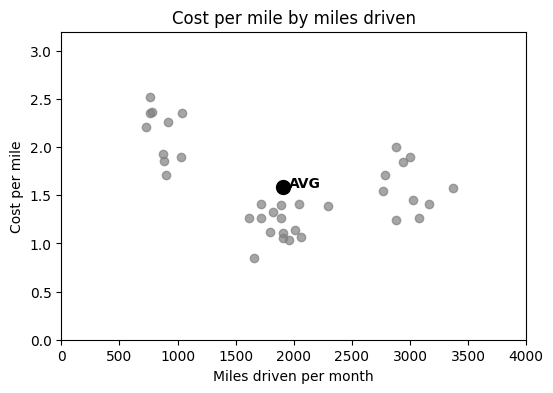

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Figure 2.6
np.random.seed(42)
miles = np.concatenate([
    np.random.normal(800, 150, 10),
    np.random.normal(2000, 200, 15),
    np.random.normal(3000, 200, 10)
])
cost_per_mile = np.concatenate([
    np.random.normal(2.3, 0.3, 10),
    np.random.normal(1.2, 0.2, 15),
    np.random.normal(1.6, 0.3, 10)
])

# Calculate average
avg_miles = np.mean(miles)
avg_cost = np.mean(cost_per_mile)

# Create the plot
plt.figure(figsize=(6, 4))
plt.scatter(miles, cost_per_mile, color='gray', alpha=0.7)

# Highlight the average point
plt.scatter(avg_miles, avg_cost, color='black', s=100)
plt.text(avg_miles + 50, avg_cost, 'AVG', fontsize=10, weight='bold')

# Customize axes and title
plt.xlabel("Miles driven per month")
plt.ylabel("Cost per mile")
plt.title("Cost per mile by miles driven")
plt.ylim(0, 3.2)
plt.xlim(0, 4000)

# Show plot
plt.show()
